# Chapter 2: Advanced concept.

The goal of this chapter is to give you sufficent programming tools to have a basic understanding of any code you'll read. It also introduce some key aspect of data treatment that you might need in the future.

Structure:
- [Object-Oriented Programming (OOP) and Class](#OOP)
- [Decorators](#Decorators)
- [Generators](#Generators)
- [Coroutines](#Coroutines)
- [Threading](#Thread)
- [Parallel](#Parallel)
- [Images, videos and audio processing](#Images)
- [SSH](#SSH)
- [Git](#Git)
- [Create a package](#package)
- [Time complexity](#Time)
- [pep8](#pep8)
- [TODO](#TODO)

<a name="OOP"></a>
## Object-Oriented Programming (OOP) and Class

Python is an Object Oriented Programming language. Everything in Python is an object (List, dict, tuples, ...) and you can create your own object using classes. Objects can have methods (e.g:for the list there’s append(),remove(), ...)  and attributes but also functions. 

If you want to read more on this idea:
- https://alyssa-e-easterly.medium.com/functional-programming-vs-object-oriented-program-d696c7075ffc
- https://www.tutorialspoint.com/python/python_classes_objects.htm

In our case we will focus on the practical side of OOP and what it means for us. Maybe you have noticed some weird behavior when you say a = b. In R for example if you change b then a won't change yet in python changing b changes also a. Why ?

From Ramalho L. Fluent python:  Clear, concise, and effective programming:

![OOP](img/OOP.png)


In [1]:
a = [1,2,3]
b = a
print(a == b, a is b)
print(id(a),id(b))

b = list(a)
print(a == b , a is b)
print(id(a),id(b))

# finding attribute of an object

dir(b)


True True
2320611516800 2320611516800
True False
2320611516800 2320611548288


['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

Ok so we have discussed the fact that object is composed of code and data. Python classes are a way to create your own object .  When to create a class ?
- You want to keep the state of functions.
- You want a structured and well organized code.

Let's see an example using the fibonacci sequence (https://en.wikipedia.org/wiki/Fibonacci_number). 

In [2]:
def fibo_recu(n):
    # fibo(0) = 0
    if n == 0:
        return 0
    # fibo(1)=1
    if n == 1:
        return 1
    # fibo(n) = fibo(n-1) + fibo(n-2)
    else:
        return(fibo_recu(n-1)+ fibo_recu(n-2))

print(fibo_recu(12))

# Not really efficient since for fibo(n) you calculate fibo(n-2) but you recalculate it for (fibo(n-1))

def fibo_list(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        starting_list = [0,1,1]
        for i in range(3,n+1):
            starting_list.append(starting_list[i-1]+starting_list[i-2])
        return starting_list[-1]

print(fibo_list(12))

# Nice but what if i want to compute the next one ? state of function = dumped => class

144
144


In [2]:
# class of Name Fibo
class Fibo:
    '''
    Description
    -----------
    Calculate the fibonacci sequence            
    '''      
    
    # Double underscore method are common to any class
    def __init__(self):
        '''
        Parameters
        ----------            
        '''        
        self.list = [0,1,1]
    
    def calculate(self, n):
        '''
        Description
        -----------
        Calculate the next n steps of the fibonnaci sequence
        Parameters
        ----------
        n : int
            value of the n next of the fibonnaci sequence is returned
        '''     
        if n == 0:
            return 0
        if n == 1:
            return 1
        if (len(self.list)-1) > n:
            return self.list[n]
        elif (len(self.list)-1) <= n:
            for i in range((len(self.list)-1),n):
                self.list.append(self.list[-1] + self.list[-2])
            return self.list[-1]
# Create instant of class
test = Fibo()
# Print the return
print(test.calculate(12))
# Print the attribute list
print(test.list)

144
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


In [4]:
print(test.calculate(6))
print(test.list)
print(test.calculate(24))
print(test.list)

8
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
46368
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]


Read more on underscore uses:
- https://dbader.org/blog/meaning-of-underscores-in-python

Here are further examples:

In [7]:
class StringManip:
    '''
    Description
    -----------
    Takes a text as input and clean it        
    '''            
    def __init__(self):
        '''
        Parameters
        ----------            
        '''        
        pass
    
    def get_String(self):
        '''
        Description
        -----------
        Aks for a text
        Parameters
        ----------            
        '''  
        self.text = input()
    
    def print_String(self):
        '''
        Description
        -----------
        Print text in upper case
        Parameters
        ----------            
        '''  
        print(self.text.upper())
        
test = StringManip()
test.get_String()
test.print_String()

hello
HELLO


In [8]:
test.text

'hello'

In [3]:
class Person:
    '''
    Description
    -----------
    Create a dict with different Person in it
    ''' 
    def __init__(self):
        '''
        Parameters
        ----------            
        Persons: dict
            contains the characteristics of individual
        id_: int
            id_ of person created for further query
        '''        
        self.Persons = {}
        self.id_ = 0
    
    def create_person(self, name, surname, age):
        '''
        Description
        -----------
        Create a dict with different Person in it
        Parameters
        ----------            
        Persons: dict
            contains the characteristics of individual
        id_: int
            id_ of person created for further query
        '''        

        self.Persons[str(self.id_)] = {"age":age,
                              "surname":surname,
                              "name":name}
        self.id_ +=1
        
    def create_mail(self,id_):
        '''
        Description
        -----------
        Add mail to data
        Parameters
        ----------            
        id_: int
            id_ of person you want to add mail
        '''   
        self.Persons[str(id_)].update({"email": self.Persons[str(id_)]["name"] + "." + self.Persons[str(id_)]["surname"]+"@outlook.fr"})

test = Person()

print(test.id_)
test.create_person("Bianchini","Stefano",35)
test.create_mail(0)


0


In [6]:
test.create_person("Bianchini","Stefano",35)
test.create_mail(1)
test.Persons

{'0': {'age': 35,
  'surname': 'Stefano',
  'name': 'Bianchini',
  'email': 'Bianchini.Stefano@outlook.fr'},
 '1': {'age': 35,
  'surname': 'Stefano',
  'name': 'Bianchini',
  'email': 'Bianchini.Stefano@outlook.fr'},
 '2': {'age': 35, 'surname': 'Stefano', 'name': 'Bianchini'}}

In [11]:
test.create_person("Bianchini","Stefano",35)
test.create_mail(1)

More interesting features @classmethod and @staticmethod. 

Read more on them here:
- https://stackoverflow.com/questions/12179271/meaning-of-classmethod-and-staticmethod-for-beginner
- https://julien.danjou.info/guide-python-static-class-abstract-methods/
- https://www.youtube.com/watch?v=rq8cL2XMM5M

In [8]:
class Game:
    '''
    Description
    -----------
    Calculate a value in fibonnaci and apply some transformation to the result
    ''' 
    # class variable shared between instances
    list = [0,1,1] 
    result = None
    def __init__(self,just_for_fun):
        '''
        Parameters
        ----------            
        just_for_fun: 
            Random variable with no real importance
        '''        
        # instance variable unique to each instance
        self.just_for_fun = just_for_fun 

    # representation of object, for other developper, goal is to be unambiguous
    def __repr__(self): 
        return "Results = None, list = [0,0,1]: {},{}".format(self.list,self.result)
    
    # readable representation, for end-user, goal is to be readable
    def __str__(self): 
        return "Results needs to be none and list has the first three fibo value: {},{}".format(self.list,self.result)
    
    # What to do when Instance 1 + instance 2
    def __add__(self,other):
        return self.result + other.result
    
    def fibo(self, n):
        '''
        Description
        -----------
        Calculate the next n steps of the fibonnaci sequence
        Parameters
        ----------
        n : int
            value of the n next of the fibonnaci sequence is returned
        '''   
        if n == 0:
            self.result = 0
        if n == 1:
            self.result = 1
        if (len(self.list)-1) > n:
            self.result = self.list[n]
        elif (len(self.list)-1) <= n:
            for i in range((len(self.list)-1),n):
                self.list.append(self.list[-1] + self.list[-2])
            self.result = self.list[-1]
    
    def collatz(self,n):
        '''
        Description
        -----------
        Perform collatz operation on self.result from fibo
        Parameters
        ----------
        n : int
            Number of time to repeat the operation
        ''' 
        for i in range(n):
            if self.result % 2 == 0:
                self.result = self.result/2
            else :
                self.result = self.result*3+1
                
    @classmethod
    def random_sequence(cls,n,result):
        '''
        Description
        -----------
        Square n times result
        Parameters
        ----------
        n : int
            Number of time to repeat the operation
        result: int
            which number to square
        ''' 
        for i in range(n):
            cls.result = result**2
    
    @staticmethod
    def is_even(x):
        '''
        Description
        -----------
        check if x is even
        Parameters
        ----------
        x : int
            number to be checked
        ''' 
        if x % 2 == 0:
            print("x is even")
        else:
            print("x is odd")



play = Game("just_for_fun")

In [9]:
print(repr(play))

Results = None, list = [0,0,1]: [0, 1, 1],None


In [10]:
print(str(play))

Results needs to be none and list has the first three fibo value: [0, 1, 1],None


In [11]:
play.fibo(10)

In [12]:
play.collatz(20)

In [13]:
play.random_sequence(2,play.result)

In [14]:
print(play.list)
play.result

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


91.0

In [15]:
play2 = Game("just_for_fun")
play2.result

8281.0

In [16]:
play + play2

8372.0

Last interesting feature that we will discuss concerning classes is inheritance (https://www.w3schools.com/python/python_inheritance.asp).

In [17]:
# inheritance

class price_of_item(Game):
    pass

play = price_of_item("just_for_fun")
play.fibo(50)
play.list
print(help(price_of_item))

Help on class price_of_item in module __main__:

class price_of_item(Game)
 |  price_of_item(just_for_fun)
 |  
 |  Method resolution order:
 |      price_of_item
 |      Game
 |      builtins.object
 |  
 |  Methods inherited from Game:
 |  
 |  __add__(self, other)
 |      # What to do when Instance 1 + instance 2
 |  
 |  __init__(self, just_for_fun)
 |      Parameters
 |      ----------            
 |      just_for_fun: 
 |          Random variable with no real importance
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  collatz(self, n)
 |      Description
 |      -----------
 |      Perform collatz operation on self.result from fibo
 |      Parameters
 |      ----------
 |      n : int
 |          Number of time to repeat the operation
 |  
 |  fibo(self, n)
 |      Description
 |      -----------
 |      Calculate the next n steps of the fibonnaci sequence
 |      Parameters
 |      ----------
 |      n : int
 |         

In [ ]:
play.result

Last class example, the Monty hall game show:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

class MontyHall:
    '''
    Description
    -----------
    Simulation of the monty hall problem. 
    3 Doors, behind one = car, 
    Choose one door then presentator opens one of the two remaining
    Stay or change your choice
    '''         
    def __init__(self):
        '''
        Parameters
        ----------            
        '''        
        self.n_win = 0
        self.n_played = 0
        self.list_doors = [0,1,2]
        self.prop = []
        
    def random_door(self):
        '''
        Description
        -----------
        Random selection of the winning door
        '''      
        self.door_win = np.random.random([3]).argmax()
    
    def choose_door(self,first_choice):
        '''
        Description
        -----------
        Select the door you want
        
        Parameters
        ----------
        first_choice : int
            The door you select at the beginning
        '''       
        self.door_choosed = first_choice
    
    def presentator(self):
        '''
        Description
        -----------
        The presentator remove one door from the option
        
        Parameters
        ----------
        '''    
        if self.door_win == self.door_choosed:
            self.door_open = np.random.random([3]).argmax()
            while self.door_open == self.door_win:
                self.door_open = np.random.random([3]).argmax()
            print("Door opened: ", self.door_open)
        else:
            do_not_choose_from = [self.door_choosed,self.door_win]
            self.door_open = [i for i in self.list_doors if i not in do_not_choose_from][0]
            print("Door opened: ", self.door_open)
            
    def player(self,decision):
        '''
        Description
        -----------
        You decide to switch or stay
        
        Parameters
        ----------
        decision: str
            stay or change
        '''   
        if decision == "stay":
            pass
        else:
            do_not_choose_from = [self.door_open,self.door_choosed]
            self.door_choosed = [i for i in self.list_doors if i not in do_not_choose_from][0]

    def win_or_loose(self):
        '''
        Description
        -----------
        Check if you choosed the right door
        
        Parameters
        ----------
        '''   
        if self.door_choosed == self.door_win:
            self.n_win += 1
            self.n_played += 1
            print("YOU WIN !!!!!")
        else:
            self.n_played +=1
            print("You loose :( ")
        self.prop.append(self.n_win/self.n_played)
    
    def plot_prop(self):
        plt.plot(self.prop)
        plt.show()        

game = MontyHall()        
n_simulation = 1000
for i in tqdm.tqdm(range(n_simulation)): 
    game.random_door()
    game.choose_door(1)
    game.presentator()
    game.player(decision = "stay")
    game.win_or_loose()



100%|██████████| 1000/1000 [00:00<00:00, 143326.41it/s]

Door opened:  2
You loose :( 
Door opened:  0
You loose :( 
Door opened:  0
YOU WIN !!!!!
Door opened:  0
YOU WIN !!!!!
Door opened:  2
You loose :( 
Door opened:  2
YOU WIN !!!!!
Door opened:  0
You loose :( 
Door opened:  2
You loose :( 
Door opened:  2
YOU WIN !!!!!
Door opened:  0
YOU WIN !!!!!
Door opened:  0
YOU WIN !!!!!
Door opened:  0
You loose :( 
Door opened:  2
YOU WIN !!!!!
Door opened:  0
YOU WIN !!!!!
Door opened:  2
You loose :( 
Door opened:  2
YOU WIN !!!!!
Door opened:  0
You loose :( 
Door opened:  2
You loose :( 
Door opened:  0
You loose :( 
Door opened:  0
You loose :( 
Door opened:  0
You loose :( 
Door opened:  2
You loose :( 
Door opened:  2
You loose :( 
Door opened:  0
You loose :( 
Door opened:  0
You loose :( 
Door opened:  0
YOU WIN !!!!!
Door opened:  2
You loose :( 
Door opened:  0
You loose :( 
Door opened:  0
You loose :( 
Door opened:  2
You loose :( 
Door opened:  2
YOU WIN !!!!!
Door opened:  0
YOU WIN !!!!!
Door opened:  0
You loose :( 
Door opene

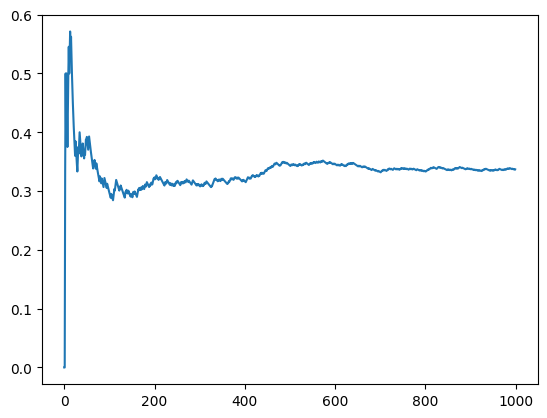

In [23]:
game.plot_prop()

<a name="Decorators"></a>
## Decorators

Python decorators is a function that takes as input a function and returns a function. In order to apply said decorator to a function you can add @my_decorator on top of the function

Using a decorator allows users to add new functionality to an existingfunction without modifying its structure. This makes it useful when working on a large project with a lot of people.

Small parantheses into *args and **kwargs. A function expect some input which are usually fixed. But in some cases you want to have a more flexible function ( Could be in developpement or production). For example looking back at our Class Person maybe there's some additional characteristics we have not thought of. Using *args and **kwargs we don't have to think about every possible characteristics and the function handles well changes. Indeed you can iterate through your args or kwargs and store them the same way as we did before. Some small examples here: https://www.programiz.com/python-programming/args-and-kwargs 

In [26]:
# Let's start with a simple decorator to time the function

import time
import re

def timeit(func):
    # We take as input a function we need to return a function hence the wrapper
    def wrapper(*args): #*args = we don't know how many args, makes it easy to apply the decorator on any function.
        start = time.time()
        result = func(*args)
        name = func.__name__
        end = time.time()
        elapsed = end-start
        print('[%0.8fs] %s ' % (elapsed, name))
        return result
    return wrapper

@timeit
def fibo_recu(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return(fibo_recu(n-1)+ fibo_recu(n-2))

@timeit
def fibo_list(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        starting_list = [0,1,1]
        for i in range(3,n+1):
            starting_list.append(starting_list[i-1]+starting_list[i-2])
        return starting_list[-1]

fibo_list(3)

fibo_recu(3)

[0.00000000s] fibo_list 
[0.00000000s] fibo_recu 
[0.00000000s] fibo_recu 
[0.00000000s] fibo_recu 
[0.00000000s] fibo_recu 
[0.00000000s] fibo_recu 


2

Decorators are being applied bottom to top in case of multiple decorators

In [27]:
import re

# New decorator to clean text
def clean(func):
    def wrapper(*args):
        txt = func(*args)
        txt = re.sub(r'None'," ",txt)
        txt = re.sub(r'\n'," ",txt)
        txt = re.sub(r'\n      '," ",txt)
        txt = re.sub(r'\t'," ",txt)
        txt = re.sub(r'\t\t'," ",txt)
        txt = re.sub(r'\n\t\t'," ",txt)
        txt = re.sub(r'  +', ' ', txt)
        txt = re.sub('>\s<', '><', txt)
        txt = txt.lower()
        return(txt)
    return(wrapper)

# create dirty text
with open("data/Chap2/dirty_text","w+") as f:
    f.write("ThiS iS \n a random \t messy text\n\n pLs Clean it before    Usage.")

file_path = "data/Chap2/dirty_text"

# Open text, clean it and time the operation
@timeit
@clean
def open_text(file_path):
    with open(file_path,"r") as f:
        txt = f.read()
    return(txt)

open_text("data/Chap2/dirty_text")


[0.00905633s] wrapper 


'this is a random messy text pls clean it before usage.'

In [21]:
# New decorator, sauqre the result of a function
def square(func):
    def wrapper(*args):
        result = func(*args)
        result = result ** 2
        return(result)
    return(wrapper)

@timeit
@square
def fibo_recu(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return(fibo_recu(n-1)+ fibo_recu(n-2))

fibo_recu(3)

[0.00000000s] wrapper 
[0.00000000s] wrapper 
[0.00099683s] wrapper 
[0.00000000s] wrapper 
[0.00099683s] wrapper 


4

<a name="Generators"></a>
## Generators

Iterables like lists are really useful. Once in memory you can do a loop to access every element. Problems arise when the object we want to iterate through is too big(Imagine importing thousands of images, or a DB with 5-6 TB). To overcome this there are Generators. With a Generator, the values are generated "lazily" meaning only when they are asked.

From https://nvie.com/posts/iterators-vs-generators/:

![iter](img/iter.png)

In [33]:
#%% Generators and yield

# Iterable vs Iterators vs generators
# Iterable = you can loop over, in dir there's the dunder method __iter__ 
# Iterator = you loop over but one element at the time, dunder method __next__
# generator = Iterator but easier to create.

# a list is an Iterable
a = [1,2,3]
print(dir(a))
print(dir(a.__iter__()))
a = a.__iter__()
next(a)


['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']


1

In [22]:
# What is the type of a range ?

next(range(5))

TypeError: 'range' object is not an iterator

In [23]:
range(5)[-1]

4

In [24]:
import tqdm

print(dir(range(5)))
print([range(5)])
x = [i for i in range(5)]

['__bool__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index', 'start', 'step', 'stop']
[range(0, 5)]


In [29]:
import types
import memory_profiler as mem_profile
# creating a generator expression
print('Memory (Before): ' + str(mem_profile.memory_usage()) + 'MB' )
stocked = [i for i in range(1000000)]
print('Memory (After) : ' + str(mem_profile.memory_usage()) + 'MB')

print('Memory (Before): ' + str(mem_profile.memory_usage()) + 'MB' )
genexp = (i for i in range(1000000))
print('Memory (After) : ' + str(mem_profile.memory_usage()) + 'MB')


isinstance(genexp, types.GeneratorType)
next(genexp)

Memory (Before): [134.1875]MB
Memory (After) : [170.921875]MB
Memory (Before): [170.921875]MB
Memory (After) : [170.921875]MB


0

In [30]:
# creating a generators function.

def gen(n):
    for n1 in range(n):
        for n2 in range(n):
            for n3 in range(n):
                yield(n1,n2,n3)

isinstance(gen(10), types.GeneratorType)

True

In [31]:
func = gen(10)

In [60]:
next(func)

(0, 2, 8)

In [61]:
# benchmark between generator, iterator, iterable

@timeit
def square_iterable(n):
    stocked = [i for i in range(n)]    
    for i in stocked:
        result = i ** 2
    return(result)


@timeit
def square_iterator(n):
    stocked = [i for i in range(n)] 
    for i in stocked.__iter__():
        result = i ** 2
    return(result)


@timeit
def square_gen(n):
    stocked = (i for i in range(n))   
    for i in stocked:
        result = i ** 2
    return(result)

square_iterable(10000000)
square_iterator(10000000)
square_gen(10000000)

[0.68022561s] square_iterable 
[0.74442673s] square_iterator 
[0.62907338s] square_gen 


99999980000001

In [66]:
%%timeit
square_iterable(10000000)

[0.68607903s] square_iterable 
[0.66205168s] square_iterable 
[0.65910769s] square_iterable 
[0.66268754s] square_iterable 
[0.65610147s] square_iterable 
[0.66723824s] square_iterable 
[0.66158438s] square_iterable 
[0.65523982s] square_iterable 
661 ms ± 4.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
square_iterator(10000000)

[0.67817855s] square_iterator 
[0.66112971s] square_iterator 
[0.66173720s] square_iterator 
[0.65360188s] square_iterator 
[0.65937400s] square_iterator 
[0.66914344s] square_iterator 
[0.65174961s] square_iterator 
[0.65105343s] square_iterator 
658 ms ± 6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
square_gen(10000000)

[0.64659405s] square_gen 
[0.64868450s] square_gen 
[0.64381075s] square_gen 
[0.64515567s] square_gen 
[0.64649391s] square_gen 
[0.64530635s] square_gen 
[0.64390588s] square_gen 
[0.64337611s] square_gen 
645 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<a name="Coroutines"></a>
## Coroutines
Coroutines is an extension of the generator (i.e:  it uses the yield concept). During the execution of a function you can pause and complete another function

When to use coroutines ?  
- Order of response. IF you want smaller task to be done first then use coroutines (Bots answering questions, website sending data,....)   
- Server requests. You have to wait the loading: do something else meanwhile.

You can indeed perform coroutines using yield statement but it might be complex to setup on your own. The library asyncio helps you in performing coroutines.

In [70]:
#%% Coroutines https://docs.python.org/3/library/asyncio.html

import asyncio

# To define a function that will be used in coroutines start with async
async def fibo_list(n):
    print("starting fibo {}".format(n))
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        starting_list = [0,1,1]
        # Collatz stuff
        for i in range(3,n+1):
            if i % 100 == 0:
                # every 100 it stop and run the next task if there is
                await asyncio.sleep(0)
            starting_list.append(starting_list[i-1]+starting_list[i-2])
        print("ending fibo {}".format(n))
        return starting_list[-1]


async def main():
    # Create the different task for the coroutines
    fibo1 = loop.create_task(fibo_list(400))
    fibo2 = loop.create_task(fibo_list(10000))
    fibo3 = loop.create_task(fibo_list(100))
    # asyncio the list of tasks
    await asyncio.wait([fibo1,fibo2,fibo3])


# init event loop
loop = asyncio.get_event_loop()
# Start the tasks
loop.run_until_complete(main())
help(asyncio.get_event_loop())

RuntimeError: This event loop is already running

In [62]:
# Note the ipython kernel itself runs on an event loop => nested so weird things, solution = nest_asyncio


import nest_asyncio
nest_asyncio.apply()

#%% Coroutines https://docs.python.org/3/library/asyncio.html

import asyncio

# To define a function that will be used in coroutines start with async
async def fibo_list(n):
    print("starting fibo {}".format(n))
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        starting_list = [0,1,1]
        # Collatz stuff
        for i in range(3,n+1):
            if i % 100 == 0:
                # every 100 it stop and run the next task if there is
                await asyncio.sleep(0)
            starting_list.append(starting_list[i-1]+starting_list[i-2])
        print("ending fibo {}".format(n))
        return starting_list[-1]


async def main():
    # Create the different task for the coroutines
    fibo1 = loop.create_task(fibo_list(400))
    fibo2 = loop.create_task(fibo_list(10000))
    fibo3 = loop.create_task(fibo_list(100))
    # asyncio the list of tasks
    await asyncio.wait([fibo1,fibo2,fibo3])


# init event loop
loop = asyncio.get_event_loop()
# Start the tasks
loop.run_until_complete(main())
help(asyncio.get_event_loop())

starting fibo 400
starting fibo 10000
starting fibo 100
ending fibo 100
ending fibo 400
ending fibo 10000
Help on _WindowsSelectorEventLoop in module asyncio.windows_events object:

class _WindowsSelectorEventLoop(asyncio.selector_events.BaseSelectorEventLoop)
 |  _WindowsSelectorEventLoop(selector=None)
 |  
 |  Windows version of selector event loop.
 |  
 |  Method resolution order:
 |      _WindowsSelectorEventLoop
 |      asyncio.selector_events.BaseSelectorEventLoop
 |      asyncio.base_events.BaseEventLoop
 |      asyncio.events.AbstractEventLoop
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  run_forever(self)
 |  
 |  run_until_complete(self, future)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from asyncio.selector_events.BaseSelectorEventLoop:
 |  
 |  __init__(self, selector=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_reader(self, fd, callback, *args)
 |   

In [63]:
import nest_asyncio
nest_asyncio.apply()

import aiohttp # Basic library for http coroutines
import asyncio
import async_timeout
import os

async def download_coroutine(session, url):
    filepath = "data/Chap2"
    # Cancel a task if timed out
    with async_timeout.timeout(10):
        # coroutine on the session.get
        async with session.get(url) as response:
            filename = os.path.basename(url)+".pdf"
            with open(os.path.join(filepath,filename), 'wb') as f_handle:
                while True:
                    # await the dl of 1024 during which do other tasks
                    chunk = await response.content.read(1024)
                    if not chunk:
                        break
                    f_handle.write(chunk)
            # end the connection
            return await response.release()

async def main(loop):
    #urls we will dl
    urls = ["https://arxiv.org/pdf/2009.00672",
        "https://arxiv.org/pdf/2009.00694",
        "https://arxiv.org/pdf/2009.00751"]
    async with aiohttp.ClientSession(loop=loop) as session:
        # Create list of tasks
        tasks = [download_coroutine(session, url) for url in urls]
        await asyncio.gather(*tasks)

loop = asyncio.get_event_loop()
loop.run_until_complete(main(loop))


C:\Users\kevin\AppData\Local\Temp\ipykernel_16628\3832103956.py:12: DeprecationWarning: with timeout() is deprecated, use async with timeout() instead
  with async_timeout.timeout(10):


Coroutines is not to be confused with threading and parallelism. Coroutines does not run things simultaneously but stops the execution of one task to execute another.

More on coroutines:

- https://stackoverflow.com/questions/50757497/simplest-async-await-example-possible-in-python
- https://www.youtube.com/watch?v=t5Bo1Je9EmE

<a name="Thread"></a>
## Threading

Each core is composed of (normally) 2 threads. You can use each threads to run operation simultaneously. Well that's in theory. Python has something called the Global Interpreter Lock (GIL) which makes it so that you can only use threads sequentially. The only difference with coroutines is that it runs task on multiple threads.

In [22]:
## joblib

from joblib import Parallel, delayed
import urllib.request

def get_pdf(url):
    filename = os.path.basename(url)+".pdf"
    response = urllib.request.urlopen(url)    
    file = open('data/Chap2/' + filename, 'wb')
    file.write(response.read())
    file.close()
    
urls = ["https://arxiv.org/pdf/2009.00672",
        "https://arxiv.org/pdf/2009.00694",
        "https://arxiv.org/pdf/2009.00751"]


Parallel(n_jobs=16, backend = 'threading')(delayed(get_pdf)(i) for i in urls)


[None, None, None]

In [23]:

from math import sqrt

def collatz(n):
    if n % 2 == 0:
        return(n/2)
    else:
        return(3*n + 1)


results = Parallel(n_jobs=2, backend = 'threading')(delayed(collatz)(i) for i in range(10))
print(results)

[0.0, 4, 1.0, 10, 2.0, 16, 3.0, 22, 4.0, 28]


<a name="Parallel"></a>
## Parallel

Tasks are executed simultaneously in multiple cores. The goal is to compute things faster. Not everything can be run in parallel. Limited by the ram.

In [64]:
import psutil 
psutil.cpu_count(logical = True)

20

In [3]:
## Multiprocessing

from multiprocessing.dummy import Pool
import urllib.request
import os

def get_pdf(url):
    filename = os.path.basename(url)+".pdf"
    response = urllib.request.urlopen(url)    
    file = open('data/Chap2/' + filename, 'wb')
    file.write(response.read())
    file.close()
    
urls = ["https://arxiv.org/pdf/2009.00672",
        "https://arxiv.org/pdf/2009.00694",
        "https://arxiv.org/pdf/2009.00751"]

pool = Pool(2)
results = pool.map(get_pdf, urls)


In [4]:
def collatz(n):
    if n % 2 == 0:
        return(n/2)
    else:
        return(3*n + 1)
    
numbers_to_process = [i for i in range(10)]

pool = Pool(2)
results = pool.map(collatz, numbers_to_process)
print(results)

[0.0, 4, 1.0, 10, 2.0, 16, 3.0, 22, 4.0, 28]


In [ ]:
## joblib

from joblib import Parallel, delayed

def get_pdf(url):
    filename = os.path.basename(url)+".pdf"
    response = urllib.request.urlopen(url)    
    file = open('data/Chap2/' + filename, 'wb')
    file.write(response.read())
    file.close()
    
urls = ["https://arxiv.org/pdf/2009.00672",
        "https://arxiv.org/pdf/2009.00694",
        "https://arxiv.org/pdf/2009.00751"]


Parallel(n_jobs=2)(delayed(get_pdf)(i) for i in urls)

In [ ]:
from math import sqrt

def collatz(n):
    if n % 2 == 0:
        return(n/2)
    else:
        return(3*n + 1)


results = Parallel(n_jobs=2)(delayed(collatz)(i) for i in range(10))

As we have seen for threading, joblib can use different backend. The default backend is called "loky". Funny enough there's also a multiprocessing backend. Read more here https://www.tutorialdocs.com/tutorial/joblib/examples.html.
Like for scrapping, parallel code tends to be another coding paradigm (even though years of work make it pretty easy to do some small stuff). The best way to learn it is to try on multiple problems.

<a name="Images"></a>
## Images, videos and audio processing

In your line of work you might have to deal with unsual (unsual can be discussed depending your background) data type like audio or images. Here's a non exhaustive list of libraries that can help you work on some type of object.

### Opencv
Opencv is a library aimed at working with images and video inrealtime (for example with your webcam or camera).  With this library you can modify your photo or apply some algorithm to detect objects.

```console
pip install opencv-python
```

Let's start by downloading an image from google

In [24]:
import requests

img_data = requests.get("https://cdnb.artstation.com/p/assets/images/images/036/365/359/large/nuno-goncalves-anor-londo-001.jpg?1617472366").content
with open('data/Chap2/random_image.jpg', 'wb') as f:
    f.write(img_data)

In [65]:
# Simple read

import cv2
import os
import numpy as np


img_path = "data/Chap2/random_image.jpg"

# flags parameter
# greyscale = 0
# IMREAD_COLOR = 1
# IMREAD_UNCHANGED = -1 
img = cv2.imread(filename = img_path,flags = -1)

# Show the img
cv2.imshow('image',img)
# Wait for any key
cv2.waitKey(0)
# Close img
cv2.destroyAllWindows()

In [66]:
# Resize image


img_path = "data/Chap2/random_image.jpg"
img = cv2.imread(filename = img_path, flags = cv2.IMREAD_UNCHANGED)

# If you need to crop the image:
#crop_img = img[45:205, 19:235] #[top:bottom,left:rigth]

# If your img is png you need to add a white background for your image or some weird transformation will happen
#trans_mask = img[:,:,3] == 0 
#img[trans_mask] = [255, 255, 255, 255]

resize_img = cv2.resize(img,(128,128))
cv2.imwrite("data/Chap2/random_image_resized.jpg", resize_img)

True

In [67]:
# Adding object on picture
import cv2

img_path = "data/Chap2/random_image.jpg"
img = cv2.imread(filename = img_path, flags = cv2.IMREAD_UNCHANGED)

#Param =  draw line on what, where start , where end, color of line(open cv BGR so blue = 255,0,0 green = 0,255,0,here white),optional line width 
cv2.line( img, (20,20), (100,150), (255,255,255), 5) 
#cv2.rectangle(img,(15,25),(100,50),(0,0,255),15) # draw secon = over line
#cv2.circle(img,(30,63), 63, (0,255,0), -1)# on image, center, radius,color, -1 fill in or lwd

# to write we need font
font = cv2.FONT_HERSHEY_SIMPLEX 
cv2.putText(img,  text = 'OpenCV Tuts!', org = (10,20), fontFace = font, fontScale = 1, color = (200,255,155), thickness = 5, lineType = cv2.LINE_AA) 

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [34]:
# change the img using grayscale, resize, add some text, a circle and save it.

img = cv2.imread(filename = img_path,flags = 0)
resize_img = cv2.resize(img,(256,256))
cv2.circle(resize_img,(30,63), 63, (0,255,0), -1)
font = cv2.FONT_HERSHEY_SIMPLEX 
cv2.putText(resize_img,'OpenCV Tuts!',(10,20), font, 1, (200,255,155), 5, cv2.LINE_AA) 
cv2.imwrite("data/Chap2/cleaned.jpg",resize_img)

True

Even though you could use algorithm on an image directly you have to realize that it an image is an heavy data source. AFor example a 4k image you is 3840x2160 pixel and each pixel has 3 channel (RGB). You basically have 24883200 int to work with. Grayscale already helps but you can go a level further and transform your data point from an int to a binary value. Grayscale goes from 0 (black) to 255 (white) the easy way to readuce even more this dimension would be to say that if pixel<125 then pixel = 0 else pixel = 1. This is a bit simplistic and the threshold is randomly assigned. Turns out there's already some more advanced type of threshold. Adaptive threshold consider not only the pixel value but also its neighbors.

In [68]:
# Threshold
img_path = "data/Chap2/random_image.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,(512,512))
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# param: img, the output of the threshold (we want white), mean gaussian to compute the value of the pixel, binary: if <threshold then 0 else 255, the size of the neighbors, finetune the threshold value
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("data/Chap2/img_cleaned.jpg",th)

True

Having a binary output helps in the computation later but maybe you want to apply another change to your image depending on the context. Maybe a focus on the vertical lines, on the contour ? Different filters exists.
For this part we will work on the feed of your webcam and not on images.

In [69]:
# Get the webcam you want to use
# 0 is my default in my case
cap = cv2.VideoCapture(0)
 
# Since its a webcam we want a continuous feed so while True 

while True:
    # cap.read returns two infos, frame is what we will work on
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    font = cv2.FONT_HERSHEY_SIMPLEX # to write we need font
    cv2.putText(frame,'OpenCV Tuts!',(10,20), font, 1, (200,255,155), 5, cv2.LINE_AA) 
    
    # Apply laplacian filter to the frame, second arg is the size of the filter
    # read more on laplacian here: https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    # read more on sobel transformation here: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    # read more on the canny edge here: https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html
    canny = cv2.Canny(frame,100,100)
    
    cv2.imshow('Original',frame)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)
    cv2.imshow('canny',canny)    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Of course there's a lot more to be discussed on opencv, if you one day work with images I really recommend you look into it ! It is probably vast enough to do a course on its own.

- https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

### pytesseract

Tesseract is an optical character recognition (OCR) tool. Transform written document(image format) to a machine readable document. To run tesseract you need to download the software here: https://github.com/UB-Mannheim/tesseract/wiki

Next to interact with python
```console
pip install pytesseract
```

In [4]:
from PIL import Image
import pytesseract

img_path = "data/Chap2/receipt.jpg"
pytesseract.pytesseract.tesseract_cmd = 'C:\\Tesseract-OCR\\tesseract.exe'

print(pytesseract.image_to_string(Image.open(img_path)))

HRH55LRlt u NEIL
STE DU PUITS
20 RUE um ERNETTES
75005 PﬂRI§ FRRNEE
ym *:112n3neu3n2.Hmr.5ma IUR nmaammue
m 45 333 555

THBLE E1
1 cauum vw we

Rerarerce Nun CDZZS33/UB3
ﬂu "'08-Z017 ’_E:E9 13

JUSTIFICFITIF

it?‘/‘ 1“) 3‘) 24
'/ﬂmsw .Z'Nmn M2563/U04

s SERUIC
DE uurnz 5:§?¥E"“

 




This example works well (I'm guessing one of the things it actually trained for). Probably morde dirty irl sor first clean the image using opencv before using tesseract. Now let's see how you can read a scanned pdf with pytesseract

### moviePy

moviePy is a Python library for video editing:  cutting, concatenations, title insertions, video compositing, video processing, and creation of custom effects. This time you need https://imagemagick.org/script/download.php. (You need to check the box install legacies during installation to have convert.exe if you are running it on windows)

- https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames

```console
pip install moviepy
```

In [70]:
import moviepy.editor as mp
import pygame
import os


FFMPEG_BINARY = os.getenv('FFMPEG_BINARY', 'ffmpeg-imageio')
IMAGEMAGICK_BINARY = os.getenv ('IMAGEMAGICK_BINARY', 'C:\\Program Files\\ImageMagick-7.1.0-Q16-HDRI\\convert.exe"')

clip = mp.VideoFileClip('data/Chap2/cat.mp4')
txt_clip = (mp.TextClip("Interstellar cat",fontsize=70,color='white')
             .set_position('center')
             .set_duration(10) )

result = mp.CompositeVideoClip([clip, txt_clip]) # Overlay text on video
result.write_videofile("data/Chap2/cat.webm",fps=25) # Many options...

clip = mp.VideoFileClip('data/Chap2/cat.mp4')
clip.preview()


ModuleNotFoundError: No module named 'moviepy'

### Pydub

”Pydub lets you do stuff to audio in a way that isn’t stupid.”(readme on github). On windows there might be some permission issue so simpleaudio is also required

```console
pip install pydub
pip install simpleaudio
```

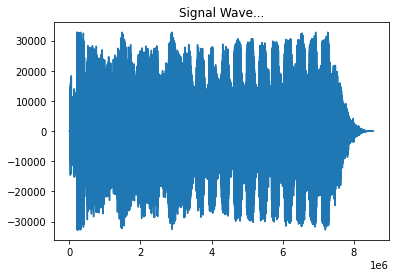

In [6]:
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
import matplotlib.pyplot as plt


sound = AudioSegment.from_wav("data/Chap2/cat.wav")
samples = sound.get_array_of_samples()
samples = np.array(samples)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(samples)
plt.show()

play(sound)


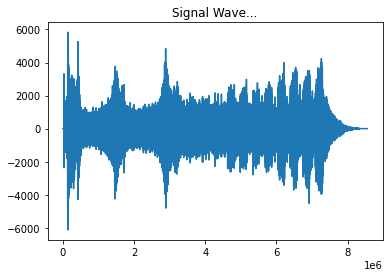

In [7]:
sound = AudioSegment.from_wav("data/Chap2/cat.wav")

sound_processed = sound.high_pass_filter(10000)
samples_processed = sound_processed.get_array_of_samples()
samples_processed = np.array(samples_processed)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(samples_processed)
plt.show()

play(sound_processed)


In [ ]:
# From stackoverflow

def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]
play(trimmed_sound.apply_gain(+10).high_pass_filter(200))

<a name="SSH"></a>
## SSH

"Secure Shell (SSH) is a cryptographic network protocol for operating network services securely over an unsecured network." (Wikipedia). 
This protocol is composed of a client side called ssh and a server side called SSHD. The client side logs into a remote machine and can execute command on said machine. This logging can be done using ssh keys which provides a more secure method of authentification than using a password. Even though SSH was meant for unix systems at the beginning, it is popular enough that a tool for windows was created: OpenSSH. 2 years ago windows launched their terminal which also supports SSH. 

The goal of this section will only be to create the SSH encryption keys for the next section "Git". 

If you are interested in creating an sshd or connecting to one, here are some tutorials that go more in depth:
- Understanding the idea behind ssh:
    * https://www.hostinger.com/tutorials/ssh-tutorial-how-does-ssh-work
- SSH on windows:
    * https://winscp.net/eng/docs/guide_windows_openssh_server
    * https://github.com/PowerShell/Win32-OpenSSH/wiki/Install-Win32-OpenSSH
    * https://www.pugetsystems.com/labs/hpc/How-To-Use-SSH-Client-and-Server-on-Windows-10-1470/

Now our goal will be to create our own SSHkeys. To do this you have two options:
- PuTTy https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html. You can then use PuTTYgen to generate your keys (Some server will require a specific format, for example the OpenSSH format. to convert the one you got from PuTTY you can use this command line in the terminal) .

```console
ssh-keygen -i -f keyfile.pub > newkeyfile.pub
```

- Using your terminal

```console
ssh-keygen -t rsa -C "your_email"
```

Make sure this email is the same as on the websites you will use this SSH key on.

If you want an additional security make sure to create a passphrase. If you do and dealing with it is to annoying make sure to create an agent (on windows: https://stackoverflow.com/questions/52113738/starting-ssh-agent-on-windows-10-fails-unable-to-start-ssh-agent-service-erro and dont forget to have OpenSSH)

You will have a public and a private key. The private key can be use to generate the public key. **Never share your private key**. You need to give your public key to the server side but never the private. You will use the private when login onto the SSHD.

If you missed any step or have any trouble you can also use this very well done tutorial: https://upcloud.com/community/tutorials/use-ssh-keys-authentication/

Make sure to know where you save your private key for the following section.

<a name="Git"></a> 
## Git WORK IN PROGRESS

"Git is a free and open source distributed version control system designed to handle everything from small to very large projects with speed and efficiency.". Git allows you to work on different features and manage the version of your software (Or any code) in a simple way using branches. You are probably familiar with Github or Bitbucket. Well these websites **host** your git versioning. Note that if you are not interested in Git or SSH keys you can use github desktop (https://desktop.github.com/) which is a straightforward way to work with Github.

For unix OS git is already installed, for windows you can download and install git here: https://git-scm.com/.
For this tutorial we will use Github as our host platform. If you don't have an account: https://github.com/signup?ref_cta=Sign+up&ref_loc=header+logged+out&ref_page=%2F&source=header-home

Once your Github account is up and running you can add your public SSH key in the settings. (note: github expect the OpenSSH format).
You can test your connection using

```console
ssh -T git@github.com
```

Before starting I recommend you to create a Github folder somewhere that you can eassily access and run the following operation inside this Github folder. 
First create a repository on github. Then on your terminal run:


```console
git init
git add .
git commit -m "First commit"
git remote add origin git@github.com:<USER_NAME>/<REPOSITORY_NAME>.git
git branch -M main
git push -u origin main
```

One of the main reason to use Github is to manage issue. People can submitt bug in your code and create an "Issue" on Github. You can then change your code and commit it:

```console
git commit -a -m "fixes #1, adding infos in readme"
git push origin
```

Note that since we already added the readme we can directly push. This will close issue #1.

We finish this section by talking about two important concepts in git: Fork and pull requests.
Creating a fork from a repository is like cloning but cloning only replicates the folder locally (on your machine). With a Fork, the repository is replicated in your list of repository. This allows you to be the owner of the replicated repository which allows you to make contribution while keeping the original code clean. Pull requests are meant to fix an issue or to add a feature to the original repository. You submit your code, they review it and merge to their own repository if everything is fine.
For example let's fork the NoSQL course of last year: https://github.com/master-ds2e/NoSQL

Now you also want to have the folder locally so clone the forked repository:

```console
git clone https://github.com/YOUR_USERNAME/NoSQL
```

Useful commands that you need to remember:

```console
git log
git branch -a
```
Remote branch = github. We are currently working on master local.
First we want to create a new branch (Learn more about branch here https://git-scm.com/book/fr/v2/Les-branches-avec-Git-Les-branches-en-bref). Why ? Because the maintainers of the original will also work on master and it will cause an issue when doing the pull request.

```console
git branch modify_projects
git checkout modify_projects
```

Now we can add change the ipynb from NoSQL that presented the projects and commit. Again the file already exist so no need to add .

```console
git commit -a -m "adding projects"
```

Before adding it to the remote you will need to change the url to use ssh:

```console
git remote set-url origin git@github.com:USERNAME/REPO.git
git push origin modify_projects
```

Now you can send a pull request to the original repository.

Read more here:
- https://www.youtube.com/watch?v=D5QGiIM1j20
- https://www.atlassian.com/git/tutorials/comparing-workflows/forking-workflow
- https://learngitbranching.js.org/?locale=fr_FR
- https://twitter.com/DataScienceDojo/status/1435740231525965826?s=19


<a name="package"></a>
## Create a package

This section is a short introduction on how to create a package and the different things to watch out for.

First thing is to create an account on PyPI and TestPyPI:

- https://pypi.org/
- https://test.pypi.org/

A basic python package has the following structure:

```
your_package
│   
└───your_package
│   │   __init__.py
│   │   scripts.py
│   CHANGELOG.txt  
│   MANIFEST.in
│   README.md
│   README.txt
│   setup.py
```

Here's an example of a package i'm developping.
The goal is to create a tool that scraps manually jokes on reddit and save it in a MongoDB.

In [ ]:
#setup.py

from setuptools import setup, find_packages
 
classifiers = [
  'Development Status :: 5 - Production/Stable', # https://pypi.org/classifiers/
  'Intended Audience :: Education',
  'Operating System :: Microsoft :: Windows :: Windows 11',
  'License :: OSI Approved :: MIT License',
  'Programming Language :: Python :: 3'
]
 
setup(
  name='pyrejoke',
  version='0.0.1',
  description='Download reddit jokes',
  long_description=open('README.txt').read() + '\n\n' + open('CHANGELOG.txt').read(),
  url='',  
  author='Kevin Wirtz',
  author_email='kevin.wirtz@unistra.fr',
  license='MIT', 
  classifiers=classifiers,
  keywords='jokes', 
  packages=find_packages(),
  install_requires=['pymongo','selenium'] 
)

In [ ]:
#MANIFEST.py

global-include *.txt *.py

In [ ]:
#CHANGELOG.txt

Change Log
==========

0.0.1 (22/09/2022)
-------------------
- First Release


In [ ]:
# download_jokes.py

import yaml
import urllib.request
from utils import scrap_reddit

with open("auth.yaml", 'r') as stream:
    infos = yaml.safe_load(stream)

banned_words = [] 
banned_words_url = "http://www.bannedwordlist.com/lists/swearWords.txt"
file = urllib.request.urlopen(banned_words_url)
for line in file:
    word = line.decode("utf-8").strip().lstrip()
    banned_words.append(word)

url = "https://www.reddit.com/r/Jokes/top/?t=day"

instance = scrap_reddit(starting_url = url,
                        banned_words = banned_words,
                        client_name = infos["client_name"],
                        db_name = infos["db_name"],
                        collection_name = infos["collection_name"])

instance.get_jokes()


In [ ]:
# utils.py

import tqdm
import time
import pymongo
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import WebDriverWait

class scrap_reddit:
    
    def __init__(self, starting_url, banned_words = None, client_name = None, db_name = None,
                 collection_name = None):
        
        options = Options()
        options.headless = True
        self.driver = webdriver.Firefox(options=options)
        self.starting_url = starting_url
        self.banned_words = banned_words
        self.driver.get(starting_url)
        self.client_name = client_name
        
        if self.client_name:
            self.client = pymongo.MongoClient(client_name)
            self.db = self.client[db_name]
            self.collection = self.db[collection_name]
        
    def check_banned_words(self,data):
        n = len([word for word in data["title"] if word in self.banned_words])
        n += len([word for word in data["post_content"] if word in self.banned_words])
        return n
        
    def parse(self, driver, url):
        
        driver.get(url)
        WebDriverWait(driver, 15).until(
            lambda driver: driver.find_elements(By.XPATH, "//h1[@class='_eYtD2XCVieq6emjKBH3m']")
            )
        title = driver.find_element(By.XPATH, "//h1[@class='_eYtD2XCVieq6emjKBH3m']").text
        post_content = driver.find_element(By.XPATH, "//p[@class='_1qeIAgB0cPwnLhDF9XSiJM']").text
        return {"title": title, "post_content": post_content, "url": url}
        
    def scrolldown(self,driver, bottom = False, n = 0 ):
        SCROLL_PAUSE_TIME = 3
        last_height = driver.execute_script("return document.body.scrollHeight")
        if bottom == True:
            while True:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(SCROLL_PAUSE_TIME)
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height
        else:
            for i in range(n):            
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(SCROLL_PAUSE_TIME)
                new_height = driver.execute_script("return document.body.scrollHeight")
                last_height = new_height

    def get_jokes(self):
        self.scrolldown(driver = self.driver, bottom = True)
        posts = self.driver.find_elements(By.XPATH,
                                          "//a[@class='SQnoC3ObvgnGjWt90zD9Z _2INHSNB8V5eaWp4P0rY_mE']")
        urls = [post.get_attribute('href') for post in posts]
        self.list_of_insertion = []
        for url in tqdm.tqdm(urls, desc = 'Looping through urls found'):
            data = self.parse(driver = self.driver, url = url)
            time.sleep(3)
            if len(data["post_content"]) > 400 :
                continue
            if self.check_banned_words(data) > 0:
                continue
            self.list_of_insertion.append(data)

        self.collection.insert_many(self.list_of_insertion)
        self.driver.close()


In [ ]:
#auth.yaml

client_name: mongodb://localhost:27017
db_name: jokes
collection_name: reddit

Once this is done you can install it locally :

```console
pip install setup.py
```

Or in "developpment mode". (Any changes in the code will be reflected directly on the package)

```console
pip install -e .
```

To make it available for everyone we will use pypi and for this you need two other package

```console
pip install setuptools twine
```

Now you can create the dist and put it on testpypi

```console
python setup.py sdist
```

```console
twine upload --repository testpypi dist/pyrejoke-0.0.1.tar.gz
```

Once you are confident enough that everything works you can put it in pypi

```console
twine upload --repository-url https://upload.pypi.org/legacy/ dist/pyrejoke-0.0.1.tar.gz
```

In [ ]:
import pyrejoke

There's a lot more to know when creating a package (Create a version on github, create documentation like readthedocs, Unitesting,....)

<a name="Time"></a>
## Time complexity

I'm guessing you already encountered notation like O(n), O(log n), O(2<sup>n</sup>), ...
<br /> This is how time complexity is expressed for algorithms. It shows the number of operation N required depending on input n. 

From https://en.wikipedia.org/wiki/Time_complexity:

<img src="img/Time.png" width="500" height="500" />

This time complexity is different depending on your programming language (Some might be equivalent). Even if the time complexity is the same for two languages you can still have a different time of execution. Indeed time complexity is just meant to measure the variation depending on the input length but the actual time the program takes to run is still dependent to other factors (CPU for starter). So a time complexity is measured by keeping everything fixed (Computer, programming language) and just changing the size of the input.

"Time complexity is commonly estimated by counting the number of elementary operations performed by the algorithm, supposing that each elementary operation takes a fixed amount of time to perform" Wikipedia. Hence we can use time instead of number of operation 

Let's do multiple example:
- https://compucademy.net/time-complexity-in-python-programming/
- https://www.javatpoint.com/post/time-complexity
- https://www.mygreatlearning.com/blog/why-is-time-complexity-essential/

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:08<00:00,  1.82it/s]


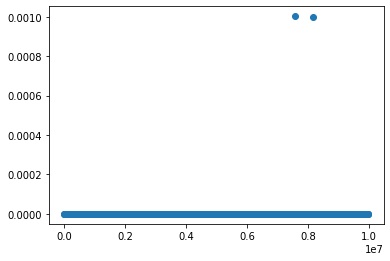

In [1]:
#First object of list

import time
import tqdm

sim = [i for i in range(1,10000000,10000)]
time_sim = []
for b in tqdm.tqdm(sim):
    x = [i for i in range(b)]
    start = time.time()
    test = x[0]
    end = time.time()
    time_sim.append(end-start)
    

import matplotlib.pyplot as plt
plt.scatter(sim, time_sim)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:57<00:00,  1.29it/s]


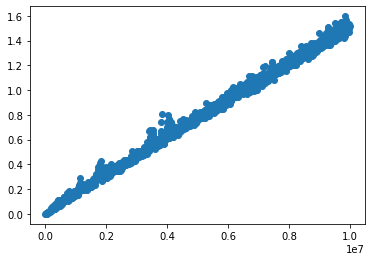

In [1]:
# Simple for loop
import time
import tqdm

sim = [i for i in range(1,10000000,10000)]
time_sim = []
for b in tqdm.tqdm(sim):
    start = time.time()

    for i in range(b):
        i + 1

    end = time.time()
    time_sim.append(end-start)
    

import matplotlib.pyplot as plt
plt.scatter(sim, time_sim)
plt.show()


<a name="pep8"></a>
## pep8

In order to facilitate coding review, there's some guidelines that have been created (kinda like import numpy as np): https://www.python.org/dev/peps/pep-0008/

I don't always respect it but I really recommend you try to follow these guidelines as much as possible so that they become habits.

<a name="TODO"></a>
## TODO

Code review:


- https://github.com/micheles/decorator
- https://github.com/sumerc/yappi
- https://github.com/CodecWang/OpenCV-Python-Tutorial
- https://github.com/michaelschmidt0913/Python/tree/master/SortingAlgorithms/Simple%20Sorting%20Analysis%20